In [19]:
import os
import pandas as pd
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [16]:
with open(os.path.join(os.getcwd(), '..', 'pre-processing', 'base-census.pkl'), 'rb') as f:
    x_census_training, x_census_test, y_census_training, y_census_test = pickle.load(f)

In [17]:
x_census_training.shape, y_census_training.shape

((27676, 108), (27676,))

In [18]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [20]:
naive_census = GaussianNB()

In [22]:
naive_census.fit(x_census_training, y_census_training)

GaussianNB()

In [23]:
predict = naive_census.predict(x_census_test)
predict

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [24]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [25]:
accuracy_score(y_census_test, predict)

0.4767656090071648

In [26]:
confusion_matrix(y_census_test, predict)

array([[1172, 2521],
       [  35, 1157]])

0.4767656090071648

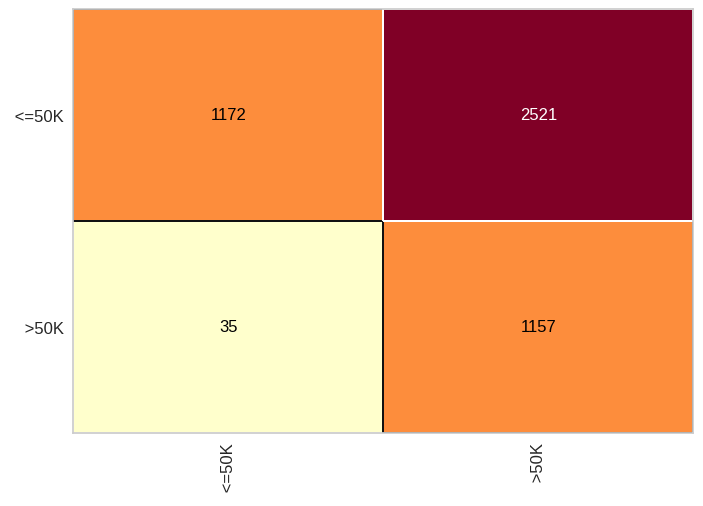

In [27]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)

In [28]:
print(classification_report(y_census_test, predict))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

